# CH273: Key Skills 1

## NVE vs NVT: a Pythonic Tale (Vol I)

<img src="./STUFF/kb_1.jpg" width="600">

In this session, we are going to explore in further detail the Boltzmann statistics - using Python, of course, particularly the `matplotlib` package to visualise the relevant distributions

In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

### (Maxwell-)Boltzmann statistic

*Fun fact: really, Boltzmann statistics should be called Maxwell-Boltzmann statistics. This statistics describes the population of the energy levels for a system of $N$ indistinguishable particles - assuming that the number of energy levels $n_E$ available to the particles is much greater than $N$. Confusingly enough, though, many refer to the Maxwell-Boltzmann distribution as the probability (density) of these particles to move around with a certain velocity. To avoid any confusion, we will refer to the Maxwell-Boltzmann statistics as "Boltzmann statistics" alone.*

Let's get to it, then. We know that, according to Boltzmann statistics, the probability of a system of $N$ indistinguishable particles to be found in a particular energy state $E_i$ is:

$$
P(E_i)  = \frac{e^{-\frac{E_i}{kBT}}}{Q(N,V,T)} 
        = \frac{e^{-\frac{E_i}{kBT}}} {\sum_{i=1}^{N}e^{-\frac{E_i}{kBT}}}
$$

which in turn is also equal to the fraction $n_i$ of particles with energy $E_i$, that is:

$$
P(E_i) = \frac{n_i}{N} = \frac{e^{-\frac{E_i}{kBT}}} {\sum_{i=1}^{N}e^{-\frac{E_i}{kBT}}}
$$

Thus, if we want to calculate how many particles $n_i$ with energy $E_i$ you would expect to find according to Boltzmann statistics...

$$ 
n_i = \frac{N\cdot e^{-\frac{E_i}{kBT}}} {\sum_{i=1}^{N}e^{-\frac{E_i}{kBT}}}
$$

### Room temperature
Consider a system at room temperature (300 K), within the NVT ensemble. This system containes 50 particles and it is characterised by 50,000 energy levels, equally spaced between 0 and $k_BT$ eV. According to the expression above...

In [2]:
# Set the temperature we are working on: 300 K
temp = 30 # K

# Define the Boltzmann constant, kB, in eV * K^{-1}
kb = 8.617333262145e-5 # eV * K^{-1}

kbt = kb * temp # eV

# How many particles?
par = 500

# How many energy values?
en = 50000

# Build a numpy array containing our 10,000 energy levels
energy = np.linspace(0,100*kbt,en)

# Compute the canonical partition function
Q = 0
for i in energy:
    Q = Q + np.exp(-i/kbt)
    
# Compute the number of particles expected to be found for each energy value
n_ei = np.zeros(en)
c = 0 # counter

for i in energy:
    n_ei[c] =  (np.exp(-i/kbt))
    c = c+1

n_ei = n_ei * (par/Q) 

In [3]:
# Check that the sum of all the mean occupation numbers if equal to the number of particles
print(par,np.sum(n_ei))

500 500.00000000000944


<IPython.core.display.Javascript object>


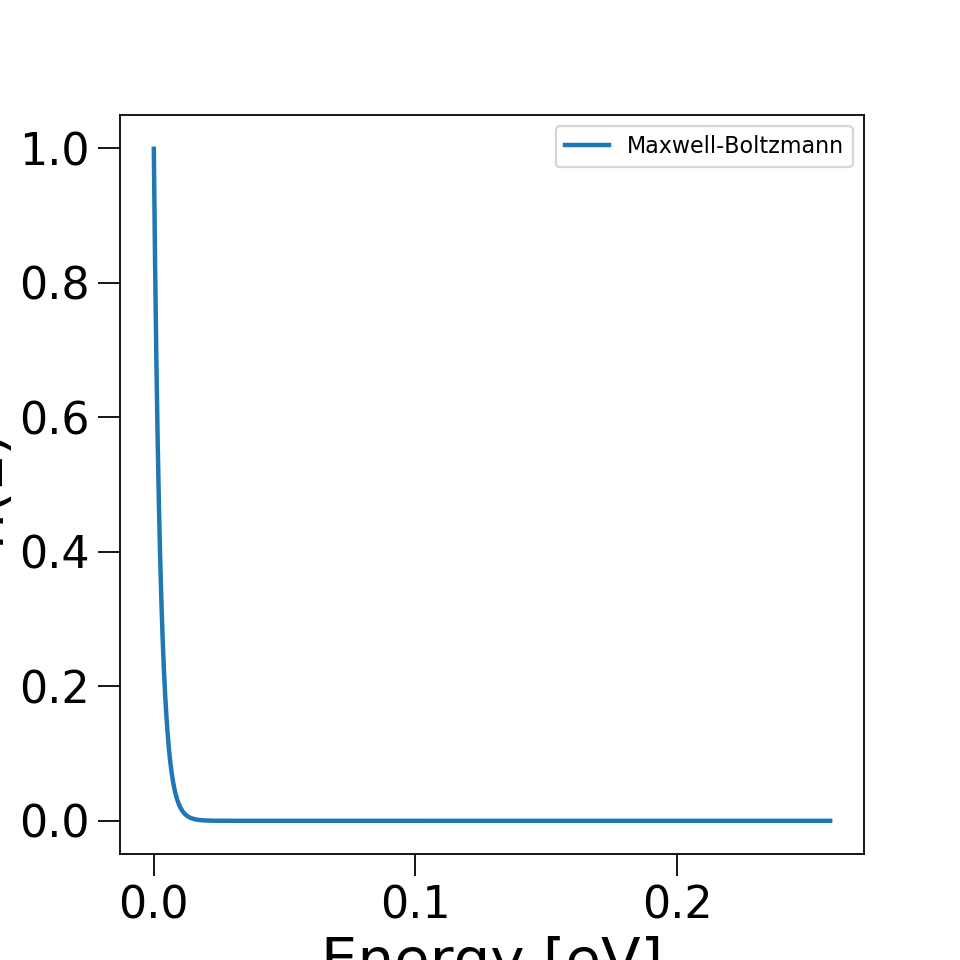

In [4]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(energy, n_ei, lw=2, label="Maxwell-Boltzmann")

plt.xlabel('Energy [eV]', fontsize=26)
plt.ylabel('n(E)', fontsize=26)
plt.legend()
plt.show()

In [5]:
# Bose-Einstein
mu = 0.01
    
# Compute the number of particles expected to be found for each energy value
n_be = np.zeros(en)
c = 0 # counter

for i in energy:
    n_be[c] =  1.0 / ((np.exp((i-mu)/kbt))-1.0)
    c = c+1
print(par,np.sum(n_be))

500 -12333.623548149948


<IPython.core.display.Javascript object>


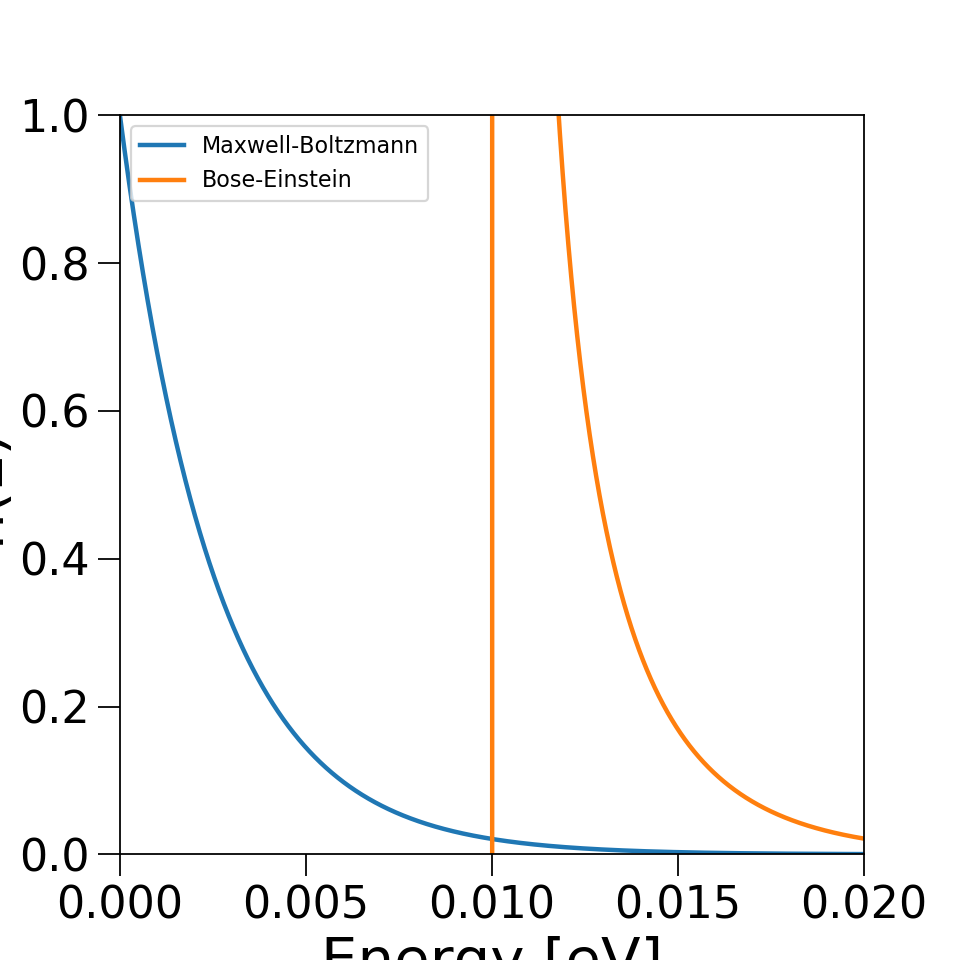

In [6]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot(energy, n_ei, lw=2, label="Maxwell-Boltzmann")
plt.plot(energy, n_be, lw=2, label="Bose-Einstein")

plt.xlabel('Energy [eV]', fontsize=26)
plt.ylabel('n(E)', fontsize=26)
plt.xlim(0,0.02)
plt.ylim(0,1)
plt.legend()
plt.show()

In [7]:
# Fermi-Dirac
    
# Compute the number of particles expected to be found for each energy value
n_fd = np.zeros(en)
c = 0 # counter

for i in energy:
    n_fd[c] =  1.0 / ((np.exp((i-mu)/kbt))+1.0)
    c = c+1
print(par,np.sum(n_fd))

500 1944.877824536689


<IPython.core.display.Javascript object>


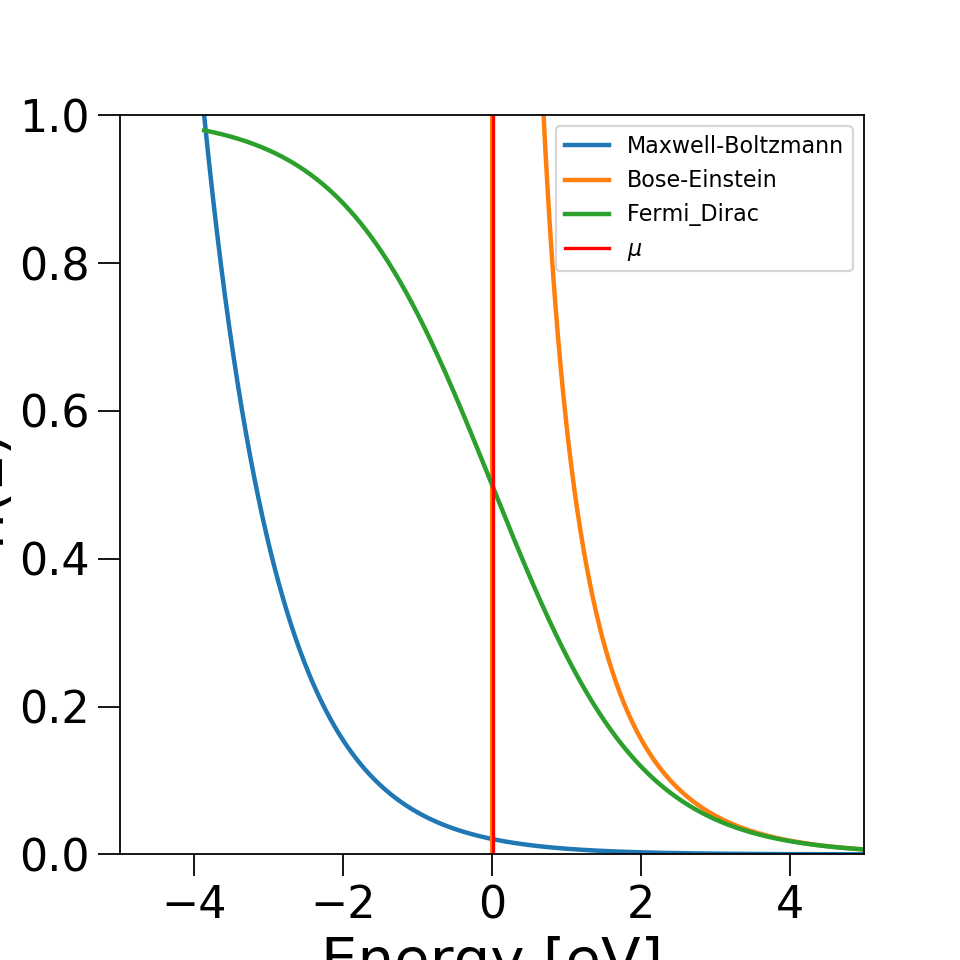

In [8]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)

plt.plot((energy-mu)/kbt, n_ei, lw=2, label="Maxwell-Boltzmann")
plt.plot((energy-mu)/kbt, n_be, lw=2, label="Bose-Einstein")
plt.plot((energy-mu)/kbt, n_fd, lw=2, label="Fermi_Dirac")
plt.axvline(x=mu, label='$\mu$', color="red")

plt.xlabel('Energy [eV]', fontsize=26)
plt.ylabel('n(E)', fontsize=26)
plt.xlim(-5,5)
plt.ylim(0,1)
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    
<h2>Task 1</h2>

* Plot the histogram of the energy data we have been using
* Plot the probability density function of the energy data we have been using
* Comment on the difference between the two...

<div/>

<IPython.core.display.Javascript object>


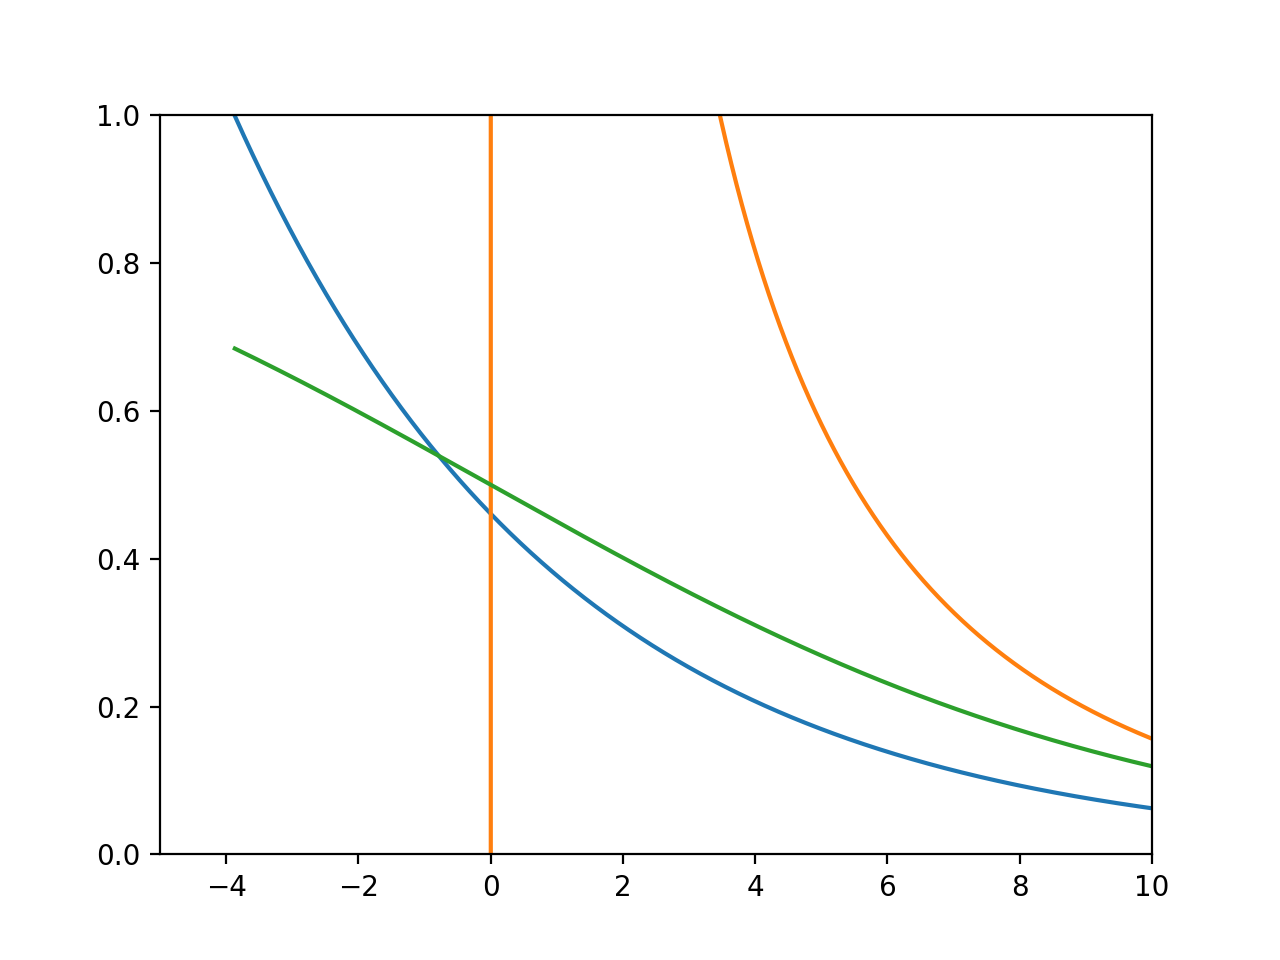

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

interactive(children=(IntSlider(value=5, description='w', max=20, min=1), Output()), _dom_classes=('widget-int…

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

mb, = ax.plot((energy-mu)/kbt, (par/Q)*np.exp(-energy/kbt))
be, = ax.plot((energy-mu)/kbt, 1.0 / ((np.exp((energy-mu)/kbt))-1.0))
fd, = ax.plot((energy-mu)/kbt, 1.0 / ((np.exp((energy-mu)/kbt))+1.0))

def update(w):
    mb.set_ydata((par/Q)*np.exp(-energy/(kbt*w)))
    fig.canvas.draw()
    
def updatee(w):
    be.set_ydata(1.0 / ((np.exp((energy-mu)/(kbt*w)))-1.0))
    fig.canvas.draw()
    
def updateee(w):
    fd.set_ydata(1.0 / ((np.exp((energy-mu)/(kbt*w)))+1.0))
    fig.canvas.draw()

plt.xlim(-5,10)
plt.ylim(0,1)
interact(update, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
interact(updatee, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
interact(updateee, w=widgets.IntSlider(min=1, max=20, step=1, value=5))
plt.show()

In [19]:
# P(NVE) = 1/N
p_nve=1/par
p_nve

0.002

<IPython.core.display.Javascript object>


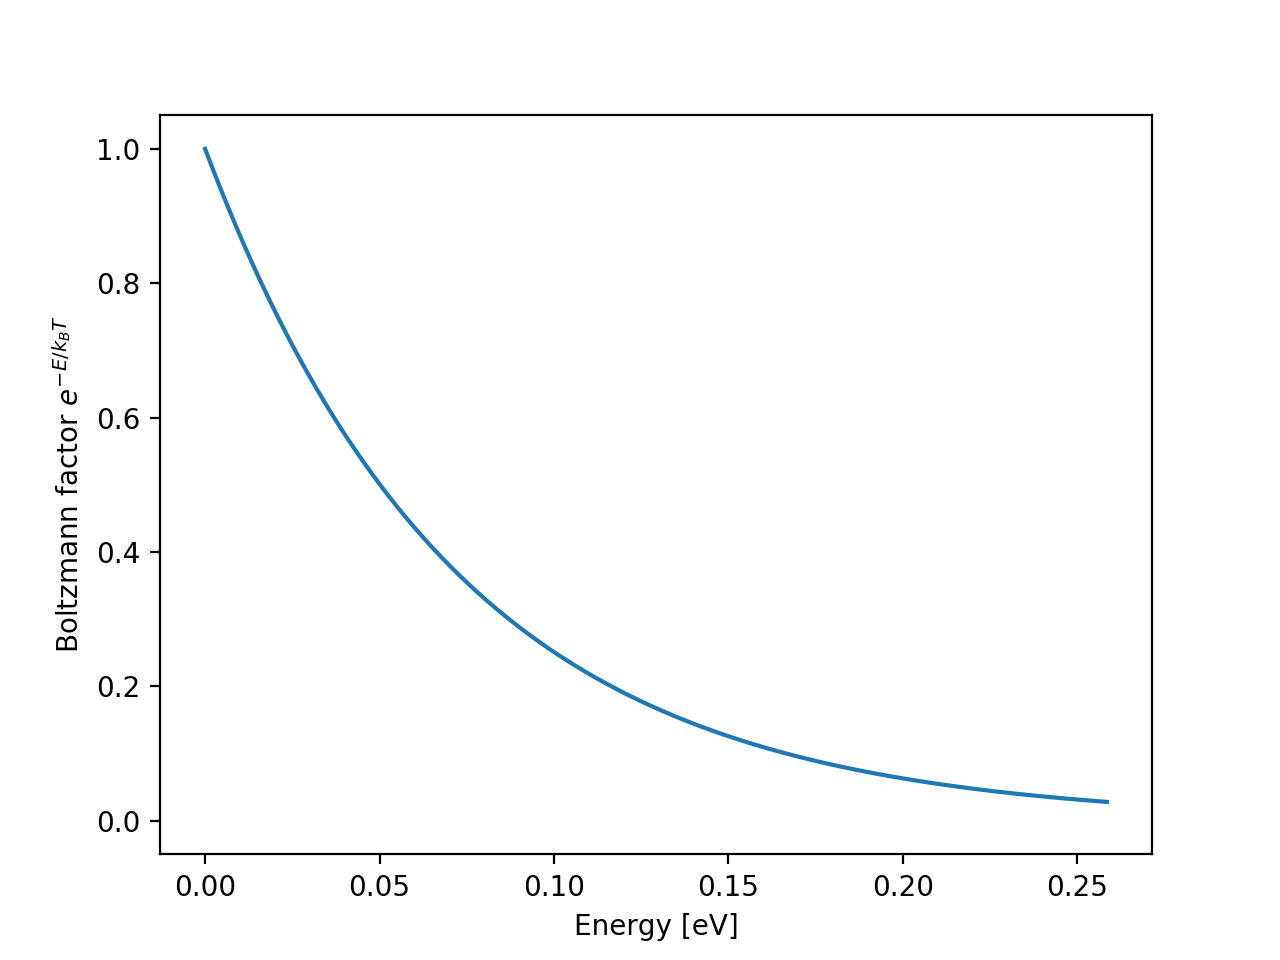

interactive(children=(IntSlider(value=20, description='w', max=50, min=1), Output()), _dom_classes=('widget-in…

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

bf, = ax.plot(energy, np.exp(-energy/kbt))

def up(w):
    bf.set_ydata(np.exp(-energy/(kbt*w)))
    fig.canvas.draw()

# plt.xlim(-5,10)
# plt.ylim(0,1)
plt.xlabel("Energy [eV]")
plt.ylabel("Boltzmann factor $e^{-E/k_BT}$")
interact(up, w=widgets.IntSlider(min=1, max=50, step=1, value=20))
plt.show()